## Fraud Detection - Imbalanced Data

In [3]:
import numpy as np 
import pandas as pd 

data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.isnull().sum().max()

0

In [6]:
print('Frauds Exist In the Dataset:', data['Class'].value_counts())
print('Frauds Percentage of Total Values:', round(data['Class'].value_counts()[1]/len(data) * 100,3))

Frauds Exist In the Dataset: 0    284315
1       492
Name: Class, dtype: int64
Frauds Percentage of Total Values: 0.173


In [7]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [16]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as grs
import seaborn as sns

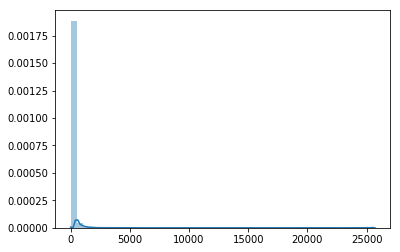

In [11]:
sns.distplot(data['Amount'].values)


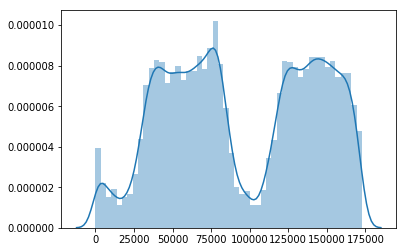

In [12]:
sns.distplot(data['Time'].values)

The peak of time is probably the daily routine of people. 

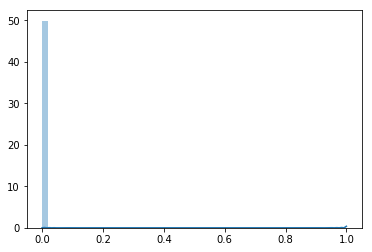

In [13]:
sns.distplot(data['Class'].values)

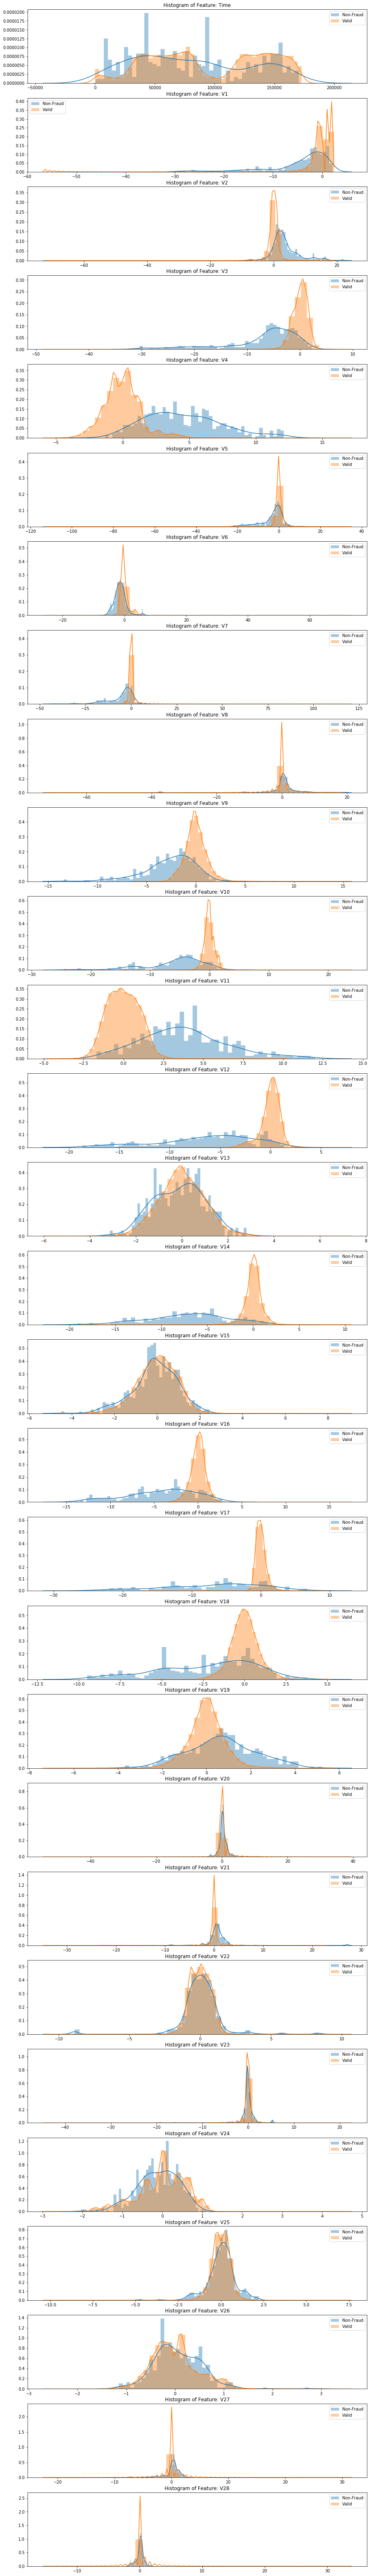

In [21]:
features = data.iloc[:,0:29].columns
plt.figure(figsize=(15,29*4))
gs = grs.GridSpec(29, 1)
for i, c in enumerate(data[features]):
    ax = plt.subplot(gs[i])
    sns.distplot(data[c][data.Class == 1], bins=50, label="Non-Fraud")
    sns.distplot(data[c][data.Class == 0], bins=50, label="Valid")
    ax.legend()
    ax.set_xlabel('')
    ax.set_title('Histogram of Feature: ' + str(c))
plt.show()


non fraud transactions are close together while the fraud ones are spread out.

(406.0, 170348.0)

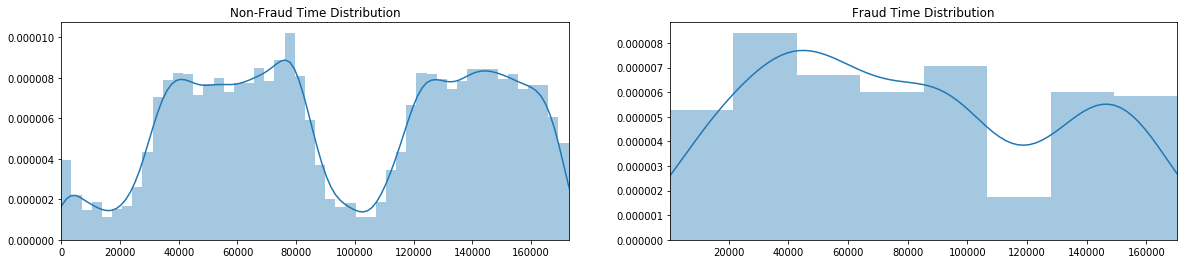

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(20,4))

nf = data[data.Class == 0].Time.values
fr = data[data.Class == 1].Time.values

sns.distplot(nf, ax=ax[0], kde=True)
ax[0].set_title('Non-Fraud Time Distribution')
ax[0].set_xlim([min(nf), max(nf)])

sns.distplot(fr, ax=ax[1], kde=True)
ax[1].set_title('Fraud Time Distribution')
ax[1].set_xlim([min(fr), max(fr)])

(0.0, 2125.87)

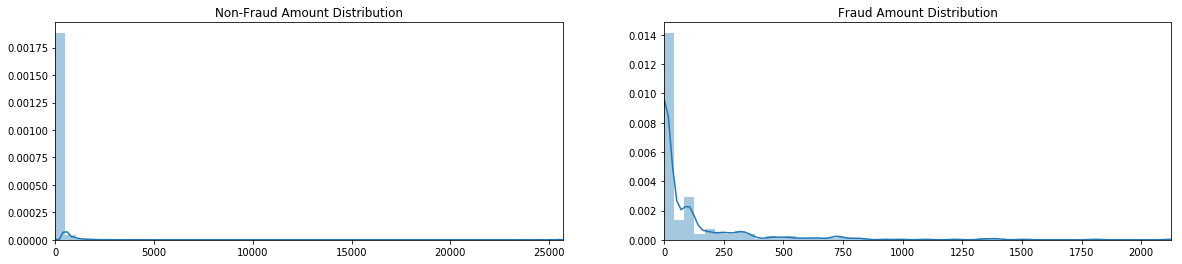

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(20,4))

nf = data[data.Class == 0].Amount.values
fr = data[data.Class == 1].Amount.values

sns.distplot(nf, ax=ax[0], kde=True)
ax[0].set_title('Non-Fraud Amount Distribution')
ax[0].set_xlim([min(nf), max(nf)])

sns.distplot(fr, ax=ax[1], kde=True)
ax[1].set_title('Fraud Amount Distribution')
ax[1].set_xlim([min(fr), max(fr)])

# Sub Sampling 

So we get to 50/50 ratio of fraud and non-fraud transactions. 
This helps us to know the correlations between the features and fraud. 

we create a sub sample by adding the 492 fraud transactions to random 492 non fraud. 

In [29]:
nfr_df = data.loc[data['Class'] == 0][:492]
fr_df = data.loc[data['Class'] == 1]


unshuffled = pd.concat([nfr_df, fr_df])
sub_df = unshuffled.sample(frac=1)

In [30]:
sub_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
78,50.0,-0.571521,1.071600,1.280110,0.542780,0.574439,-0.259359,1.061148,-0.410972,-0.179130,...,0.003559,0.561240,-0.199287,0.001387,-0.179530,-0.374116,0.071641,-0.175510,9.79,0
143333,85285.0,-7.030308,3.421991,-9.525072,5.270891,-4.024630,-2.865682,-6.989195,3.791551,-4.622730,...,1.103398,-0.541855,0.036943,-0.355519,0.353634,1.042458,1.359516,-0.272188,0.00,1
314,227.0,-1.465381,1.382172,1.019790,0.250367,1.011414,-1.281807,1.186866,-0.312608,-0.701503,...,-0.038147,0.083481,-0.266017,0.270833,0.754353,-0.491529,-0.689819,-0.329374,1.00,0
59539,48884.0,-2.139051,1.394368,-0.612035,1.049327,-1.162102,-0.768219,-1.997237,0.574997,-0.980832,...,0.696955,0.740003,-0.155115,-0.050607,0.268368,-0.469433,-0.405814,-0.152171,19.73,1
6427,7610.0,0.725646,2.300894,-5.329976,4.007683,-1.730411,-1.732193,-3.968593,1.063728,-0.486097,...,0.589669,0.109541,0.601045,-0.364700,-1.843078,0.351909,0.594550,0.099372,1.00,1


In [32]:
print('Frauds Exist In the Dataset:', sub_df['Class'].value_counts())
print('Frauds Percentage of Total Values:', round(sub_df['Class'].value_counts()[1]/len(sub_df) * 100,3))

Frauds Exist In the Dataset: 1    492
0    492
Name: Class, dtype: int64
Frauds Percentage of Total Values: 50.0
